In [164]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from math import sqrt
import seaborn as sns

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [165]:
#read the data from the local machine and take a look at the variables
df = pd.read_csv('C:\\Users\\tejan\\Downloads\\practicedata\\diabetescsv\\diabetes.csv') 
print(df.shape)
df.describe()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [166]:
#checking the target variable class proportion
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

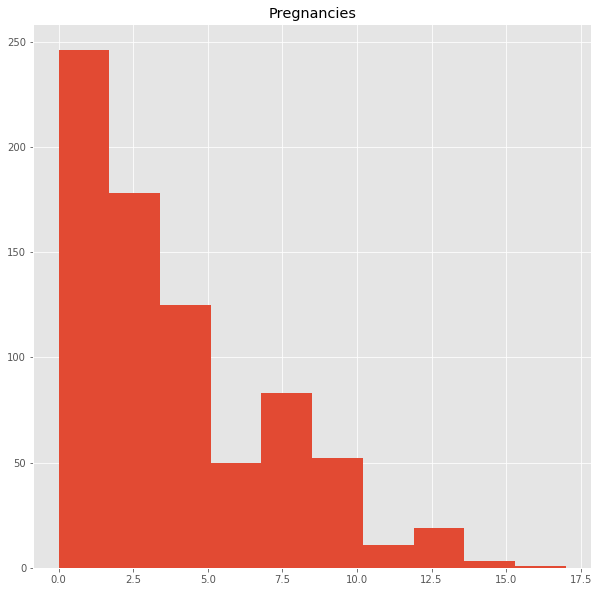

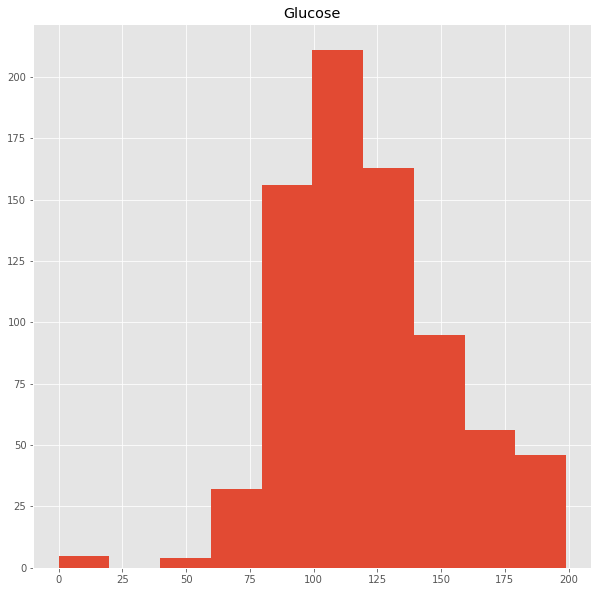

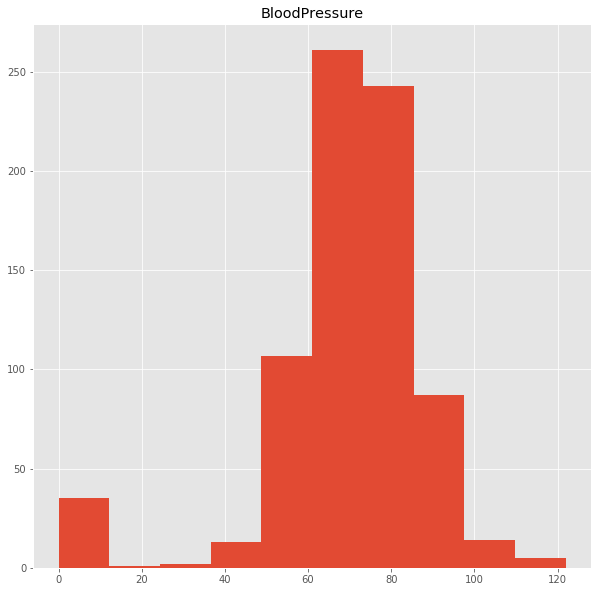

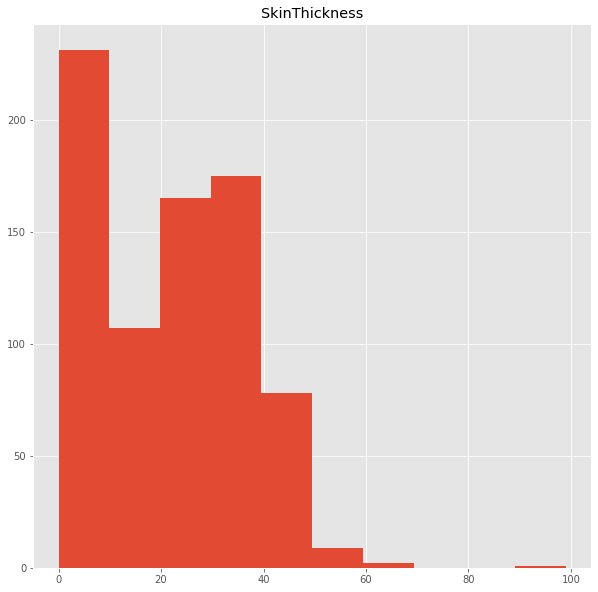

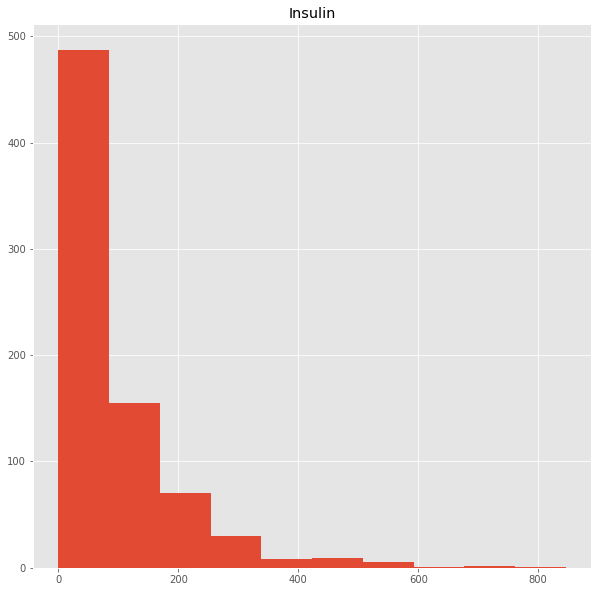

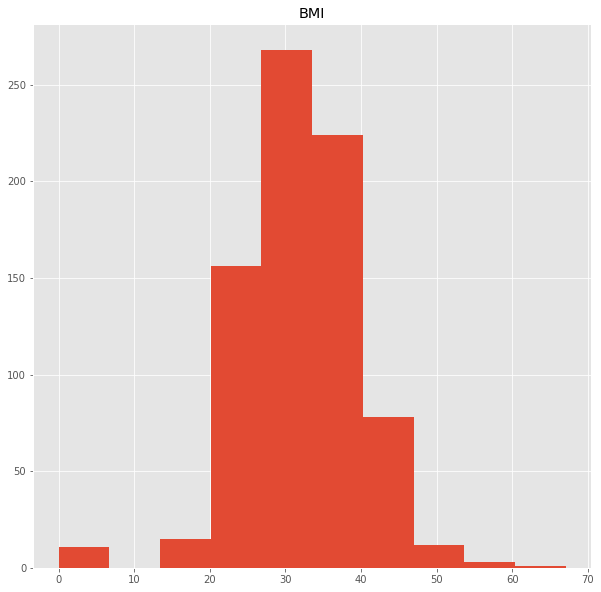

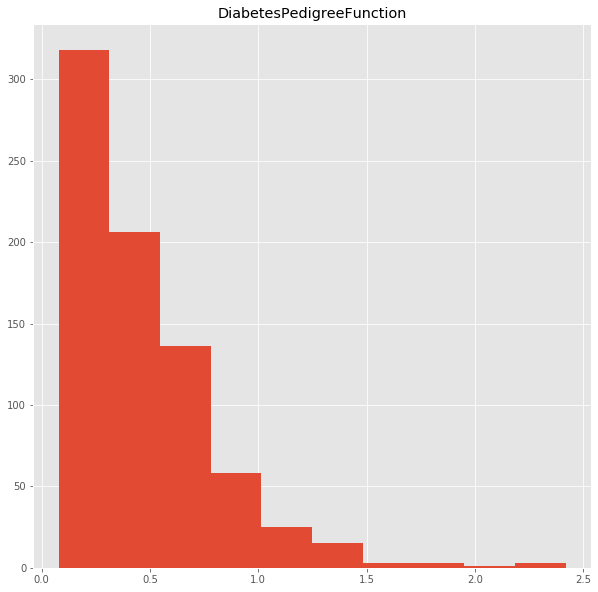

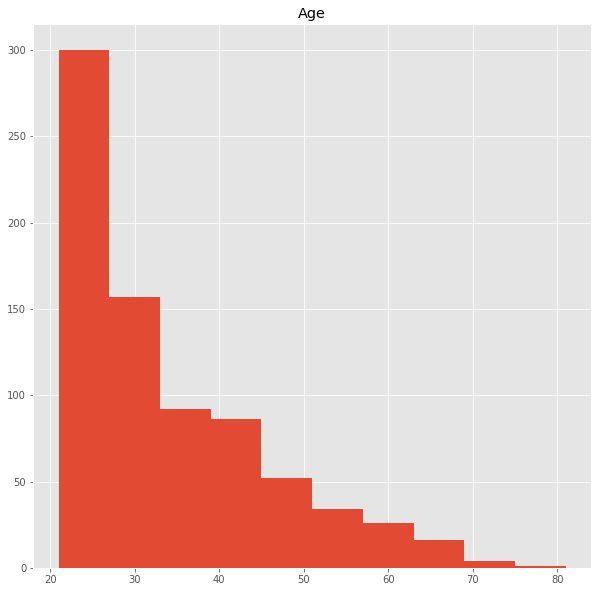

In [48]:
#See the distribution of the variables in the data
for i in range(len(df.columns.values)-1):
    plt.figure(figsize=(10,10))
    ax = plt.hist(df[df.columns[i]])    
    plt.title(df.columns[i])
    plt.show()

The variables seem to have skewed distributions. So, standardizing the data is a good idea before usi ng the data in any models.

In [167]:
#Separate the target variable out from the features 
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))

#Convert the features and labels to numpy arrays. Then split the data to holdout sample.
X = df[predictors].values
y = np.ravel(df[target_column].values)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape); print(X_test.shape)

(576, 8)
(192, 8)


In [168]:
#randomly underrsample the training data. Dont touch the validation data
rus = RandomUnderSampler(random_state=123)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Undersampled training dataset shape %s' % Counter(y_rus))
print('Original dataset shape %s' % Counter(y))
print('Validation dataset shape %s' % Counter(y_test))

Undersampled training dataset shape Counter({0: 195, 1: 195})
Original dataset shape Counter({0: 500, 1: 268})
Validation dataset shape Counter({0: 119, 1: 73})


In [169]:
#Scale the data
scaler = StandardScaler().fit(X_rus)
X_rus = scaler.transform(X_rus)
X_test = scaler.transform(X_test)  

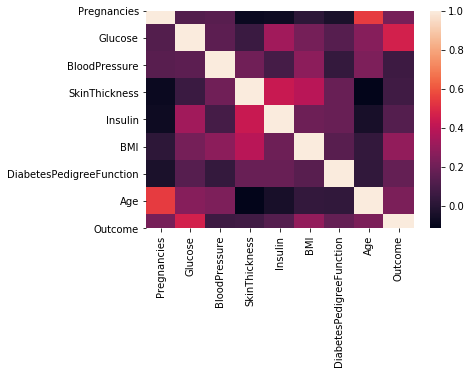

In [170]:
#Look at the correlogram
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

# Modeling

Model 1: Hidden layers = 1(4), optimizer = sgd, epochs = 10

In [171]:
#initialize the sequential model
model = Sequential()

#input layer prepared to take 8 inputs
model.add(Dense(8, activation='relu', input_shape=(8,)))

#hidden layer with 4 neurons
model.add(Dense(4, activation='relu'))

#output layer with sigmoid activation
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history = model.fit(X_rus, y_rus,epochs=10, batch_size=1, validation_data=(X_test, y_test), verbose=0)

#print the training accuracy of the model after 10 th epoch
score_train = model.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(10, score_train[1]*100))

#print the validation accuracy of the model after 10 th epoch
score_test = model.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(10, score_test[1]*100)) 

The training accurcay after 10 epochs is 76.923%
The validation accurcay after 10 epochs is 79.688%


In [172]:
#define a custom funcation to plot the Accuracy and Loss for epochs
def plot_the_performance(history):
    acc = np.ravel(history.history['accuracy'])*100
    val_acc = np.ravel(history.history['val_accuracy'])*100
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    #customize the plot
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy(%)')
    plt.plot(x, val_acc, 'r', label='Validation accuracy(%)')
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Epochs")
    plt.title('Training and Validation accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

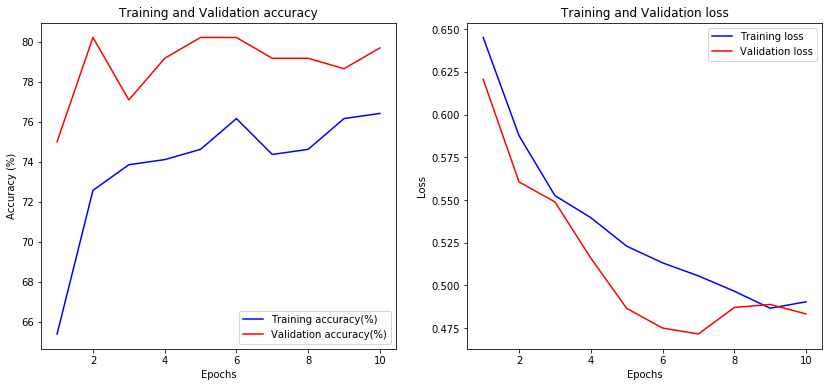

In [173]:
plot_the_performance(history)

The model seems to have recahed peak performance level for 10 epochs. There is no sign of overfitting. Infact, the validation accuracy is higher than training accuracy.

Model 2: Hidden layers = 2 (16,6), activation = relu, epochs = 10

In [185]:
model2 = Sequential()

model2.add(Dense(24, activation='relu', input_shape=(8,)))

model2.add(Dense(16, activation='relu'))

model2.add(Dense(6, activation='relu'))

model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
history2 = model2.fit(X_rus, y_rus,epochs=10, batch_size=1, validation_data=(X_test, y_test), verbose=0)

#print the training accuracy of the model after 10th epoch
score_train = model2.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(10, score_train[1]*100))

#print the validation accuracy of the model after 10 th epoch
score_test = model2.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(10, score_test[1]*100))  

The training accurcay after 10 epochs is 80.769%
The validation accurcay after 10 epochs is 76.562%


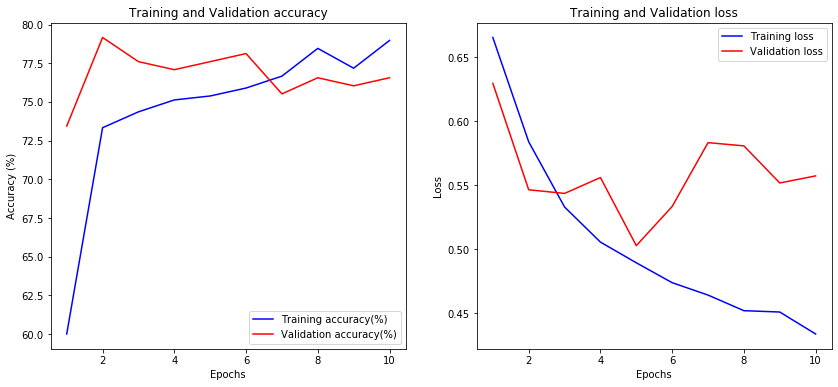

In [186]:
plot_the_performance(history2)

Increasing the model complexity didnt help in increasing the accuracy. It decreased the accuracy. But the model is overfitting.

Model 3: Hidden layers = 2 (16,6), optimizer = adam

In [176]:
model3 = Sequential()

model3.add(Dense(24, activation='relu', input_shape=(8,)))

model3.add(Dense(16, activation='relu'))

model3.add(Dense(6, activation='relu'))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history3 = model3.fit(X_rus, y_rus,epochs=10, batch_size=1, validation_data=(X_test, y_test), verbose=0)

#print the training accuracy of the model after 10th epoch
score_train = model3.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(10, score_train[1]*100))

#print the validation accuracy of the model after 10 th epoch
score_test = model3.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(10, score_test[1]*100)) 

The training accurcay after 10 epochs is 79.487%
The validation accurcay after 10 epochs is 79.167%


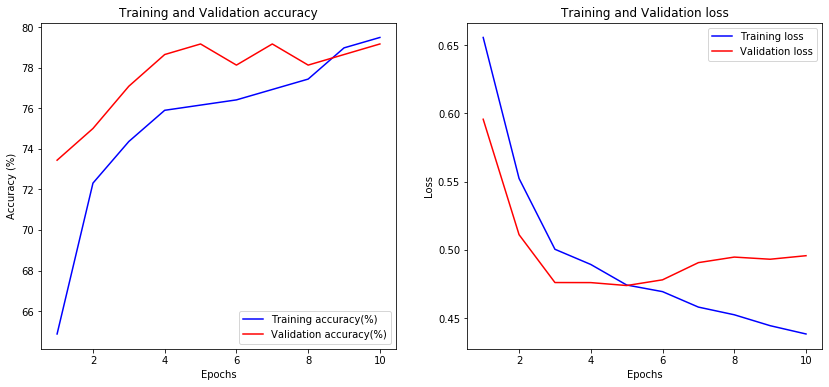

In [177]:
plot_the_performance(history3)

This model is the best so far in terms of validation accuracy and not overfitting.

Model 4: Model 3 + elastic net regularization

In [179]:
model4 = Sequential()

model4.add(Dense(24, activation='relu', input_shape=(8,),kernel_regularizer=keras.regularizers.l1_l2(l1=0.01, l2=0.01)))

model4.add(Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.05)))

model4.add(Dense(8, activation='relu'))

model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history4 = model4.fit(X_rus, y_rus,epochs = 20, batch_size=1, validation_data=(X_test, y_test), verbose=0)

#print the training accuracy of the model after 20 th epoch
score_train = model4.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(20, score_train[1]*100))

#print the validation accuracy of the model after 20 th epoch
score_test = model4.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(20, score_test[1]*100))  

The training accurcay after 20 epochs is 78.462%
The validation accurcay after 20 epochs is 78.125%


Elastic net regularization has also solved the problem of overfitting. But the validation accuracy has dropped a bit.

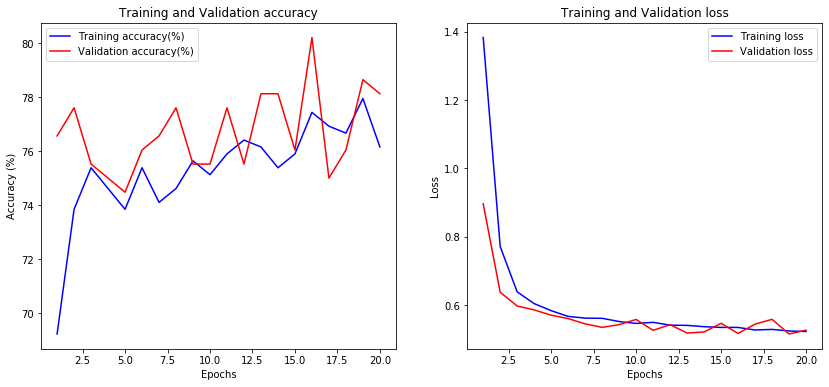

In [180]:
plot_the_performance(history4)

Model 5: Model 3 + Batch Normalization

The training accurcay after 20 epochs is 88.205%
The validation accurcay after 20 epochs is 76.562%


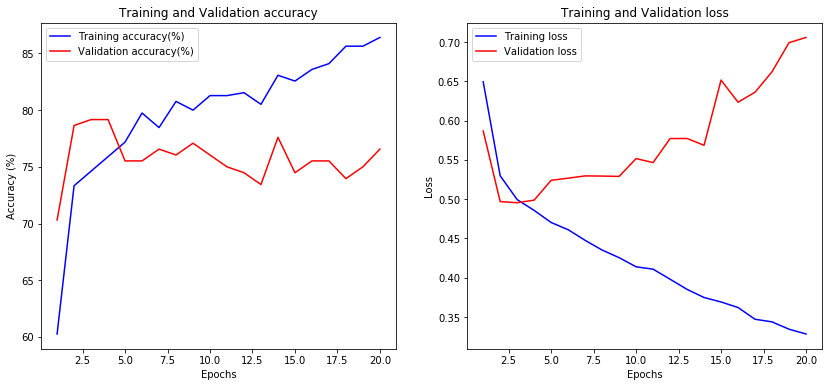

In [181]:
model5 = Sequential()

model5.add(Dense(24, activation='relu', input_shape=(8,)))
model.add(BatchNormalization())

model5.add(Dense(16, activation='relu'))
model.add(BatchNormalization())

model5.add(Dense(8, activation='relu'))
model.add(BatchNormalization())

model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
history5 = model5.fit(X_rus, y_rus,epochs=20, batch_size=1, validation_data=(X_test, y_test), verbose=0)

#print the training accuracy of the model after 20 th epoch
score_train = model5.evaluate(X_rus, y_rus, verbose=0)
print("The training accurcay after {} epochs is {:.3f}%". format(20, score_train[1]*100))

#print the validation accuracy of the model after 20 th epoch
score_test = model5.evaluate(X_test, y_test, verbose=0)
print("The validation accurcay after {} epochs is {:.3f}%". format(20, score_test[1]*100))  

plot_the_performance(history5)

Batch Normalization has not reduced the overfitting. It reduced the validation accuracy though. So, I will not use it.

# Experimenting on Model 3 (Optimizer = sgd, hidden layers = 2 (16,8), loss = binary cross entropy, activation  = relu) with regularization terms

Param: 0.100000, Train: 76.667, Test: 76.042
Param: 0.010000, Train: 77.179, Test: 76.562
Param: 0.001000, Train: 77.179, Test: 77.083
Param: 0.000100, Train: 78.462, Test: 80.208
Param: 0.000010, Train: 78.718, Test: 77.083
Param: 0.000001, Train: 75.641, Test: 76.042
Param: 0.000000, Train: 75.641, Test: 73.958
Param: 0.000000, Train: 77.949, Test: 76.562


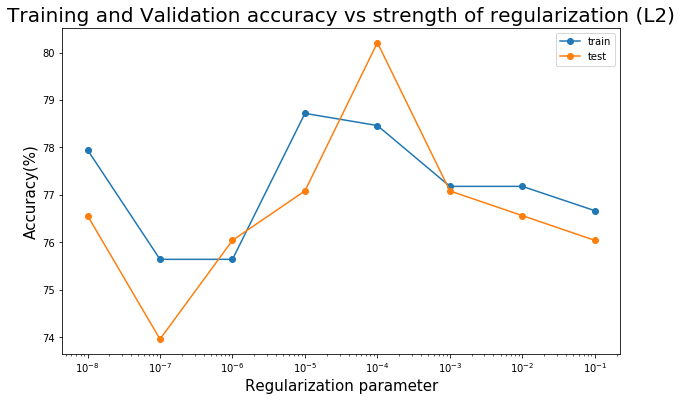

In [192]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
train, test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(8,)))

    model.add(Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l2(param)))

    model.add(Dense(8, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    # fit model
    model.fit(X_rus, y_rus, epochs=20, verbose=0)
    # evaluate the model
    _, train_acc = model.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc*100)
    test.append(test_acc*100)
# plot train and test accuracy
plt.figure(figsize = (10,6)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='o')
plt.title("Training and Validation accuracy vs strength of regularization (L2)", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

Param: 0.100000, Train: 74.615, Test: 72.396
Param: 0.010000, Train: 75.641, Test: 78.646
Param: 0.001000, Train: 76.667, Test: 78.125
Param: 0.000100, Train: 79.487, Test: 77.083
Param: 0.000010, Train: 77.949, Test: 77.604
Param: 0.000001, Train: 78.974, Test: 73.958
Param: 0.000000, Train: 77.692, Test: 76.042
Param: 0.000000, Train: 78.462, Test: 75.521


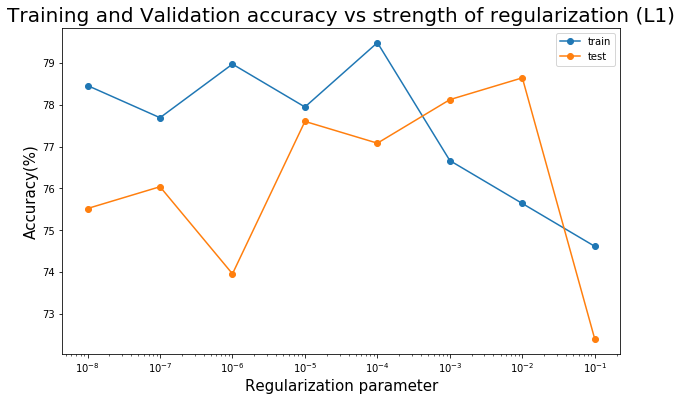

In [191]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
train, test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(8,)))

    model.add(Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l1(param)))

    model.add(Dense(8, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
	# fit model
    model.fit(X_rus, y_rus, epochs=20, verbose=0)
	# evaluate the model
    _, train_acc = model.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc*100)
    test.append(test_acc*100)
# plot train and test accuracy
plt.figure(figsize = (10,6)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='o')
plt.title("Training and Validation accuracy vs strength of regularization (L1)", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

Param: 0.100000, Train: 71.026, Test: 75.000
Param: 0.010000, Train: 77.179, Test: 78.125
Param: 0.001000, Train: 77.179, Test: 77.604
Param: 0.000100, Train: 77.179, Test: 76.562
Param: 0.000010, Train: 77.949, Test: 74.479
Param: 0.000001, Train: 78.462, Test: 77.083
Param: 0.000000, Train: 75.897, Test: 73.958
Param: 0.000000, Train: 77.436, Test: 78.125


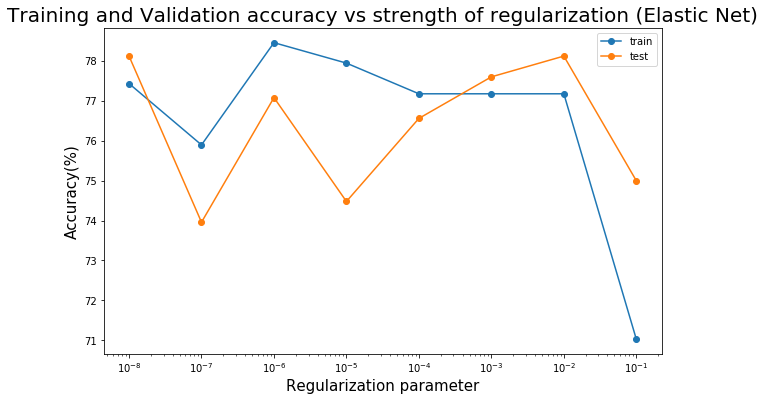

In [190]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
train, test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(8,)))

    model.add(Dense(16, activation='relu',kernel_regularizer=keras.regularizers.l1_l2(param, param)))

    model.add(Dense(8, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
	# fit model
    model.fit(X_rus, y_rus, epochs=20, verbose=0)
	# evaluate the model
    _, train_acc = model.evaluate(X_rus, y_rus, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc*100, test_acc*100))
    train.append(train_acc*100)
    test.append(test_acc*100)
# plot train and test accuracy
plt.figure(figsize = (10,6)) 
plt.semilogx(values, train, label='train', marker='o')
plt.semilogx(values, test, label='test', marker='o')
plt.title("Training and Validation accuracy vs strength of regularization (Elastic Net)", fontsize = 20)
plt.xlabel("Regularization parameter", fontsize = 15)
plt.ylabel("Accuracy(%)", fontsize = 15)
plt.legend()
plt.show()

From the above 3 experiments, we can see that L1 is a stronger penalty than L2. L1 is dropping the validation accuracy as well compared to L2.